# Aufgabe 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bew, fix, x, y, z = np.loadtxt('translation-nur-translation.txt',delimiter=',', skiprows = 1, unpack = True, usecols=(0,1,2,3,4))

In [3]:
x

array([  0.    ,  -4.8329, -14.7942, -19.9738, -27.9518,   4.8251,
         0.    ,  -9.6918, -15.871 , -23.9163,  14.8111,   9.7127,
         0.    ,  -6.1601, -13.7562,  21.7674,  15.8723,   6.1595,
         0.    ,  -7.5637,  27.9325,  23.8866,  13.7602,   7.568 ,   0.    ])

In [4]:
y

array([ 0.    ,  0.1065, -0.3314,  1.0932, -0.2742, -0.1209,  0.    ,
       -0.6047,  0.9802, -0.3624,  0.3449,  0.6039,  0.    ,  1.6273,
       -0.0416, -1.1602, -0.9965, -1.6327,  0.    , -1.5884,  0.2704,
        0.334 ,  0.0281,  1.5803,  0.    ])

In [5]:
# Gemessene Kamera-Abstände: 
x_gemessen = [0, 1.6, 3.6, 5.4, 6.8]

# Verschiebung Pixel Positionen
x_trafo = [0, 4.8251, 14.8111, 21.7674, 27.9325]

In [6]:
cms = np.zeros((5,5))
pixels = np.zeros((5,5))

In [7]:
# Fülle die Matrix der Abstände mit den Abständen
for i in range(len(x_gemessen)):
    for j in range(len(x_gemessen)):
        #print(i,j)
        cms[i][j] = np.abs(x_gemessen[j]-x_gemessen[i])

In [8]:
# Fülle die Translationen in cm über das txt-Dokument
for i in range(len(bew)-1):
    pixels[int(bew[i])-1][int(fix[i])-1] = np.abs(x[i])

In [9]:
cms

array([[ 0. ,  1.6,  3.6,  5.4,  6.8],
       [ 1.6,  0. ,  2. ,  3.8,  5.2],
       [ 3.6,  2. ,  0. ,  1.8,  3.2],
       [ 5.4,  3.8,  1.8,  0. ,  1.4],
       [ 6.8,  5.2,  3.2,  1.4,  0. ]])

In [10]:
pixels

array([[  0.    ,   4.8329,  14.7942,  19.9738,  27.9518],
       [  4.8251,   0.    ,   9.6918,  15.871 ,  23.9163],
       [ 14.8111,   9.7127,   0.    ,   6.1601,  13.7562],
       [ 21.7674,  15.8723,   6.1595,   0.    ,   7.5637],
       [ 27.9325,  23.8866,  13.7602,   7.568 ,   0.    ]])

In [11]:
res_cms = []
res_pixels = []
for i in range(5):
    for j in range(i, 5):
        res_cms.append(cms[i][j])
        res_pixels.append(pixels[i][j])


In [27]:
res_cms = np.array(res_cms)

In [28]:
res_pixels = np.array(res_pixels)

In [30]:
np.shape(np.ones(15))

(15,)

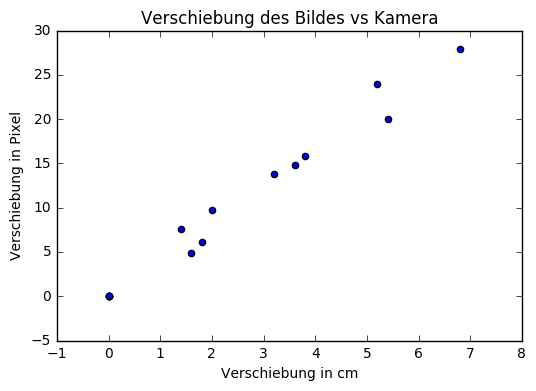

In [31]:
plt.scatter(res_cms, res_pixels)
plt.title('Verschiebung des Bildes vs Kamera')
plt.xlabel('Verschiebung in cm')
plt.ylabel('Verschiebung in Pixel')
plt.show()

[ 4.12649787  0.06064495]
96.7720634103
7.44400487771
Wahrscheinlichkeit = 0.0%
0.153139706952


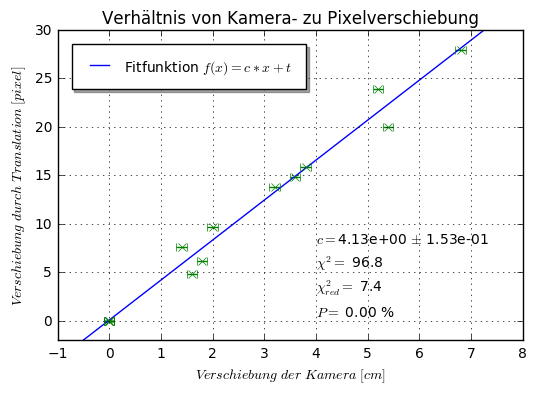

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Fitten einer Gerade an die Daten: 
def linear(x, c, t): 
    return c*x + t
popt, pcov = curve_fit(linear, res_cms, res_pixels)

x = np.linspace(-3,10, 100)
plt.plot(x, linear(x, *popt), linestyle='-', label='Fitfunktion $f(x)=c*x + t $') #Fit plotten
stdfehler = np.sqrt(pcov[0,0])
print(popt)


#Chi-quadrat-Summe berechnen
chisquare=np.sum((res_pixels - linear(res_cms, *popt))**2/((np.ones(15)*linear(0.1, *popt))**2))
dof=len(res_cms)-2 #degrees of freedom, Freiheitsgrade
chisquare_red=chisquare/dof
print(chisquare)
print(chisquare_red)

#Fitwahrscheinlichkeit berechnen: 
from scipy.stats import chi2
prob=round(1-chi2.cdf(chisquare, dof), 2)*100
print('Wahrscheinlichkeit = '+str(prob)+'%')


#Plotten der berechneten Werte unter die Legende
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.text(4, 8, '$c=$%.2e $\pm$ %.2e' %(popt[0], stdfehler ), fontsize=10)
plt.text(4, 5.5, '$\chi^{2}=$ %.1f' %(chisquare), fontsize=10)
plt.text(4, 3, '$\chi_{red}^{2}=$ %.1f ' %(chisquare_red), fontsize=10)
plt.text(4, 0.5, '$P=$ %.2f ' %(prob) + '%', fontsize=10)

#Plot der Werte
plt.errorbar(res_cms, res_pixels, xerr=0.1, linestyle='none', marker='x')

#Achsenbeschriftungen des Plots
plt.xlabel('$Verschiebung\ der\ Kamera\ [cm]$')
plt.ylabel('$Verschiebung\ durch\ Translation\ [pixel]$')
plt.title('Verhältnis von Kamera- zu Pixelverschiebung')
plt.axis((-1, 8, -2, 30))
plt.legend(loc='best', borderpad=1, borderaxespad=1, shadow='true', fontsize='medium')
plt.grid(True)

print(stdfehler)
#Plot abspeichern
plt.savefig('Verhältnis_Verschiebung.pdf', dpi=300, format='pdf')

In [75]:
from scipy.stats import chisquare
chisquare(f_obs=res_pixels, f_exp=linear(res_cms, *popt), ddof=13, axis=0)

Power_divergenceResult(statistic=2.3200626235878157, pvalue=0.12771488435951087)